In [ ]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import kagglehub
path = kagglehub.dataset_download("shivamb/netflix-shows")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/netflix-shows


**PROJECT TITLE**: **Netflix Movies & TV Shows Exploratory Data Analysis**

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

In [22]:
df = pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [23]:
df.shape  # rows, columns
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


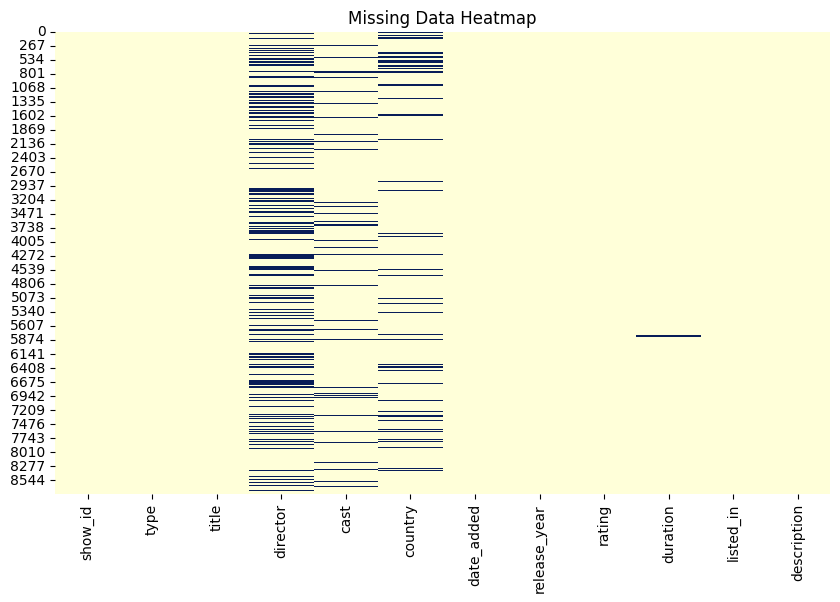

In [24]:
df.isnull().sum()

# Visualize missing data
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap="YlGnBu")
plt.title("Missing Data Heatmap")
plt.show()


In [29]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', errors='coerce')

# Extract year and month
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# Fill missing values with 'Unknown'
df.fillna({'country': 'Unknown', 'director': 'Unknown', 'cast': 'Unknown'}, inplace=True)


 **Exploratory Data Analysis (EDA)**

a. Content Type Count (Movie vs TV Show)

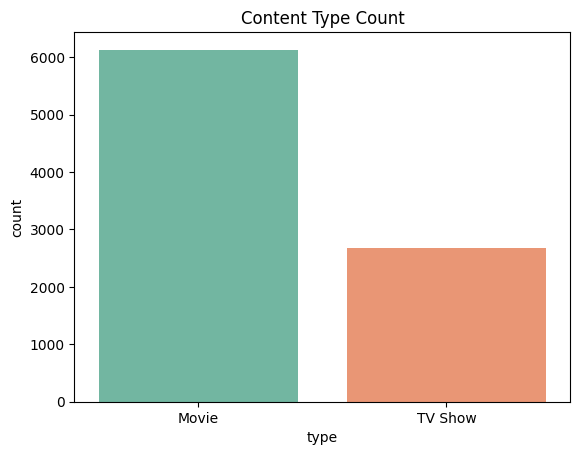

In [30]:
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Content Type Count')
plt.show()

b. Top 10 Countries with Most Netflix Titles

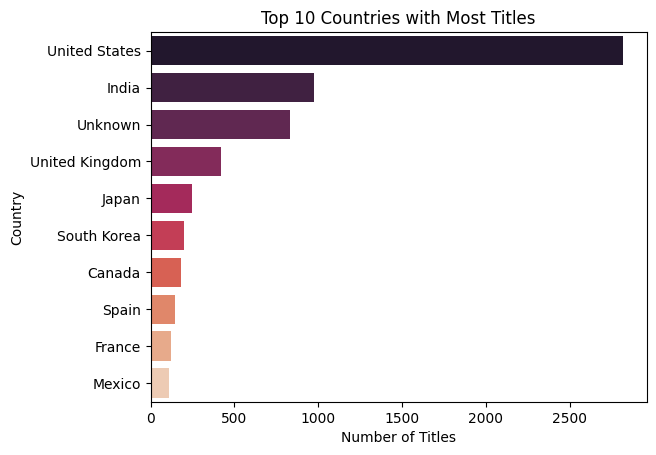

In [31]:
top_countries = df['country'].value_counts().head(10)

sns.barplot(y=top_countries.index, x=top_countries.values, palette='rocket')
plt.title('Top 10 Countries with Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

c. Content Added Per Year

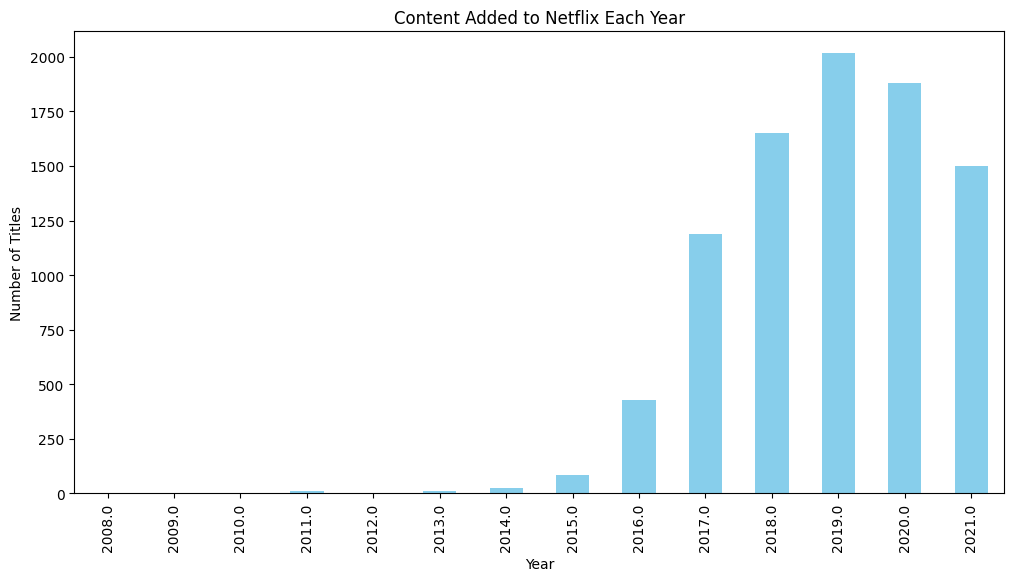

In [32]:
df['year_added'].value_counts().sort_index().plot(kind='bar', figsize=(12,6), color='skyblue')
plt.title('Content Added to Netflix Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()


d.Top 10 Genres/Category

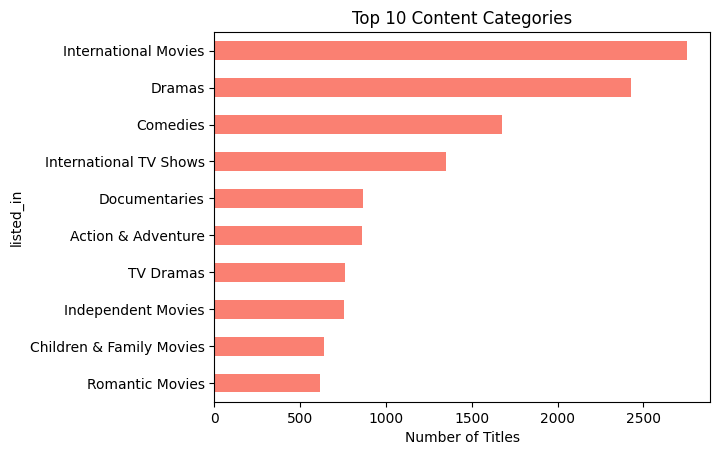

In [35]:
df['listed_in'].str.split(', ').explode().value_counts().head(10).plot(kind='barh', color='salmon')
plt.title('Top 10 Content Categories')
plt.xlabel('Number of Titles')
plt.gca().invert_yaxis()
plt.show()

e.Top Directors on Netflix

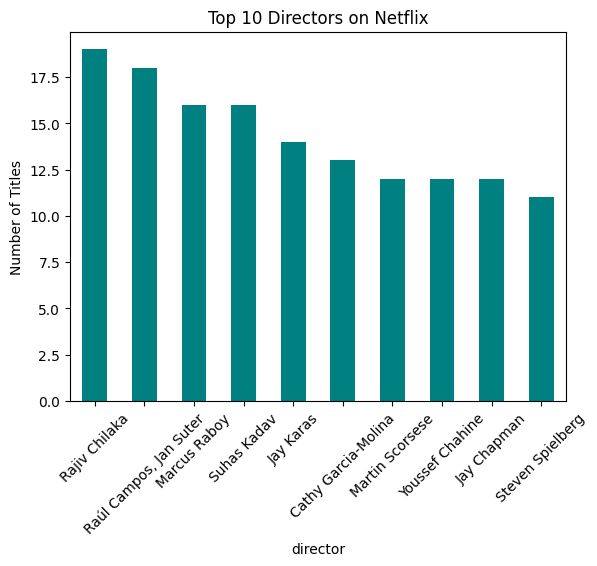

In [34]:
df[df['director'] != 'Unknown']['director'].value_counts().head(10).plot(kind='bar', color='teal')
plt.title('Top 10 Directors on Netflix')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()


Summary and Insights

* Netflix has more Movies than TV Shows.

* Most content is from USA, India, and UK.

* The most common categories are Dramas, Comedies, and International Movies.

* Netflix saw the highest content additions around 2019-2020.

